In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [417]:
df = pd.read_csv("/content/drive/MyDrive/campus x /Capstone Project /gurgaon_properties_outliers_trated")

In [418]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [419]:
df.head()

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,...,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score,area_bedroom_ratio
0,0.0,0.0,ireo victory valley,2.99,sector 67,11832.0,2527.000,flat,Super Built up area 2527(234.77 sq.m.)Built Up...,2527.040803,...,East,relatively new,1.0,0.0,0.0,0.0,0.0,0.0,37.0,842.0
1,1.0,1.0,signature global park,0.58,sohna road,7056.0,822.000,flat,Built Up area: 822 (76.37 sq.m.)Carpet area: 6...,NaN,...,NaN,undefined,0.0,0.0,0.0,0.0,0.0,1.0,58.0,411.0
2,2.0,2.0,chd avenue,0.95,sector 71,7917.0,1200.000,flat,Built Up area: 1200 (111.48 sq.m.),NaN,...,South,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0,600.0
3,3.0,3.0,ansal maple heights,1.50,sector 43,12658.0,1185.000,flat,Super Built up area 1400(130.06 sq.m.)Built Up...,1399.952834,...,North-East,old property,0.0,0.0,0.0,0.0,1.0,0.0,174.0,395.0
4,4.0,4.0,sector 15 part 2 rwa,10.00,sector 15,22222.0,4500.045,house,Plot area 502(419.74 sq.m.),NaN,...,East,old property,0.0,0.0,0.0,0.0,0.0,1.0,49.0,900.0


In [420]:
df.isnull().sum()

level_0                   0
index                     0
society                 361
price                     0
sector                    0
price_per_sqft            0
area                      0
property_type             0
areaWithType              0
super_built_up_area    1685
built_up_area          2048
carpet_area            1749
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 15
facing                 1035
agePossession             0
servant room              0
pooja room                0
study room                0
others                    0
store room                0
furnishing_type           0
luxary_score              0
area_bedroom_ratio        0
dtype: int64

# Missing values in area column

Text(0.5, 1.0, 'built_up_area vs carpet_area')

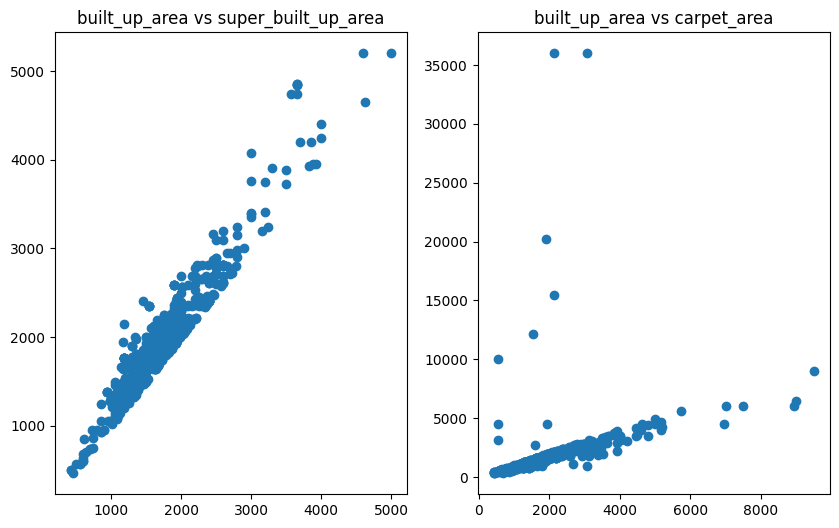

In [421]:
#lets check the relation of built up area with other area

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.scatter(df['built_up_area'], df['super_built_up_area'])
plt.title('built_up_area vs super_built_up_area')


plt.subplot(1,2,2)
plt.scatter(df['built_up_area'], df['carpet_area'])
plt.title('built_up_area vs carpet_area')

we can see from the above scatter plot there is a strong linear relation between built_up-super_built_up  and built_up-carpet

In [422]:
#since there is linear relation between two parameters we can calculate the average ration which this two parameters hold and then using that ratio
#we can estimate any one missing parametr from  available parameter

#calculating ratio between super_built_up to built_up
super_to_built_up = (df['super_built_up_area']/df['built_up_area']).median()

#calculating ratio between carpet to built_up
carpet_to_built_up = (df['carpet_area']/df['built_up_area']).median()

super_to_built_up, carpet_to_built_up

(1.1114952853717026, 0.8893333333333333)

our goal is to impute all the missing values in built_up_area. To do this we have calculated the raio in previous step so that if built_area is missing then we can utilise super_built up or carpet_area to impute built_up

In [423]:
#lets check is there any row where all the areas are missing
all_missing = df[df['super_built_up_area'].isna() & df['built_up_area'].isna() & df['carpet_area'].isna()]

In [424]:
all_missing.shape

(33, 26)

In [425]:
#function for imputing missing values
def carpet (x):
  pattern_1 = r"\b\d+\.\d+\b"
  pattern_2 = r"Carpet area: ((\d+(\.\d+)?)) sq\.m\."
  pattern_3 = r"Carpet area: \d+ \((\d+(\.\d+)?) sq\.m\.\)"
  result_1 = re.search(pattern_1, x)
  result_2 = re.search(pattern_2, x)
  result_3 = re.search(pattern_3, x)
  result_2
  if result_1 :
    return float(result_1.group())*10.7
  elif result_2:
    return float(result_2.group(1))*10.7
  elif result_3:
    return float(result_3.group(1))*10.7
  else:
    return np.nan

def built_up(x):
  pattern_1 = r"Built Up area: ((\d+(\.\d+)?)) sq\.m\."
  pattern_2 = r"Built Up area: ((\d+(\.\d+)?))"
  result_1 = re.search(pattern_1, x)
  result_2 = re.search(pattern_2, x)
  if result_1:
   return float(result_1.group(1))*10.7
  elif result_2:
    return float(result_2.group(1))*10.7
  else :
    return np.nan

In [426]:
all_missing['carpet_area'] = all_missing['areaWithType'].apply(carpet)
all_missing['built_up_area'] = all_missing['areaWithType'].apply(built_up)
df.update(all_missing)

<ipython-input-426-4dbcadc86276>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_missing['carpet_area'] = all_missing['areaWithType'].apply(carpet)
<ipython-input-426-4dbcadc86276>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_missing['built_up_area'] = all_missing['areaWithType'].apply(built_up)


In [427]:
df = df[~(df['super_built_up_area'].isna() & df['built_up_area'].isna() & df['carpet_area'].isna())]

so now there is no row where all areas are missing

In [428]:
#imputing built_up using both super and carpet
sc = df[~(df['super_built_up_area'].isna()) & df['built_up_area'].isna() & ~(df['carpet_area'].isna())]

sc['built_up_area'].fillna((sc['super_built_up_area']/super_to_built_up + sc['carpet_area']/carpet_to_built_up)/2, inplace = True)
df.update(sc)

<ipython-input-428-e00820ca5ba9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc['built_up_area'].fillna((sc['super_built_up_area']/super_to_built_up + sc['carpet_area']/carpet_to_built_up)/2, inplace = True)
<ipython-input-428-e00820ca5ba9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(sc)
<ipython-input-428-e00820ca5ba9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [429]:
df[~(df['super_built_up_area'].isna()) & df['built_up_area'].isna() & ~(df['carpet_area'].isna())]

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,...,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score,area_bedroom_ratio


In [430]:
#imputing built_up using super_built_up
sb = df[~(df['super_built_up_area'].isna()) & (df['built_up_area'].isna())]

sb['built_up_area'].fillna(sb['super_built_up_area']/super_to_built_up, inplace = True)
df.update(sb)

<ipython-input-430-8524a9a2856f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb['built_up_area'].fillna(sb['super_built_up_area']/super_to_built_up, inplace = True)
<ipython-input-430-8524a9a2856f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(sb)
<ipython-input-430-8524a9a2856f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [431]:
df[~(df['super_built_up_area'].isna()) & df['built_up_area'].isna() & ~(df['carpet_area'].isna())]

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,...,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score,area_bedroom_ratio


In [432]:
#imputing built_up using carpet area

cb = df[(df['built_up_area'].isna()) & ~(df['carpet_area'].isna())]

cb['built_up_area'] = round(cb['carpet_area'] / carpet_to_built_up)
df.update(cb)

<ipython-input-432-8ab34e415033>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb['built_up_area'] = round(cb['carpet_area'] / carpet_to_built_up)
<ipython-input-432-8ab34e415033>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(cb)
<ipython-input-432-8ab34e415033>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [433]:
 df[(df['built_up_area'].isna()) & ~(df['carpet_area'].isna())]

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,...,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score,area_bedroom_ratio


In [434]:
df.isna().sum()

level_0                   0
index                     0
society                 361
price                     0
sector                    0
price_per_sqft            0
area                      0
property_type             0
areaWithType              0
super_built_up_area    1679
built_up_area             0
carpet_area            1718
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 15
facing                 1030
agePossession             0
servant room              0
pooja room                0
study room                0
others                    0
store room                0
furnishing_type           0
luxary_score              0
area_bedroom_ratio        0
dtype: int64

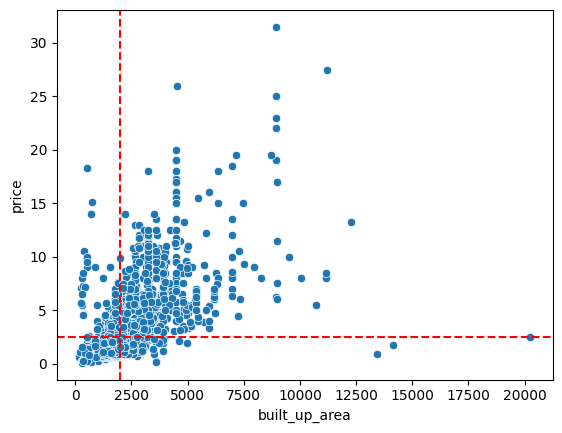

In [435]:
#scatter plot between built_up and price
sns.scatterplot(x = df['built_up_area'], y = df['price'])
plt.axhline(y=2.5, color='r', linestyle='--', label='Horizontal Line at y=3')
plt.axvline(x=2000, color='r', linestyle='--', label='Horizontal Line at y=3')


we can see the points above 2.0 cr and behind 2000 sq.ft. This points indicates the very high price for area below 2000 sq.ft which is not possible we will call this points as "anamoly"

In [436]:
#Investigatting anamoly points
anamoly_df = df[(df['built_up_area'] <2000) & (df['price'] > 5)]

In [437]:
anamoly_df.head()

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,...,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score,area_bedroom_ratio
59,61.0,62.0,NaN,9.0,sector 13,11111.111111,8100.000000,house,Plot area 900(83.61 sq.m.),NaN,...,NaN,old property,0.0,0.0,0.0,0.0,0.0,1.0,0.0,810.0
108,112.0,114.0,dlf city plots phase 2,10.5,sector 25,29021.555556,3618.000413,house,Plot area 402(37.35 sq.m.),NaN,...,East,old property,1.0,1.0,0.0,0.0,0.0,0.0,91.0,905.0
129,134.0,138.0,NaN,6.6,sector 25,36667.000000,1799.983637,house,Plot area 200(167.23 sq.m.),NaN,...,East,moderately old,1.0,0.0,1.0,0.0,0.0,0.0,119.0,300.0
186,196.0,201.0,ambience caitriona,14.0,sector 24,22222.222222,6300.000000,flat,Built Up area: 700 (65.03 sq.m.),NaN,...,East,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1575.0
198,209.0,214.0,NaN,6.5,sector 25,36111.000000,1800.005538,house,Plot area 200(167.23 sq.m.),NaN,...,North-East,moderately old,1.0,1.0,1.0,0.0,1.0,1.0,61.0,450.0


we can see the area is differing a lot from built_up_area due to this in scatter plot we are seeing high price even for small area

In [438]:
#replacing built_up_area with area
anamoly_df['built_up_area'] = anamoly_df['area']

#updating original df
df.update(anamoly_df)

<ipython-input-438-e70c54ddece1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anamoly_df['built_up_area'] = anamoly_df['area']


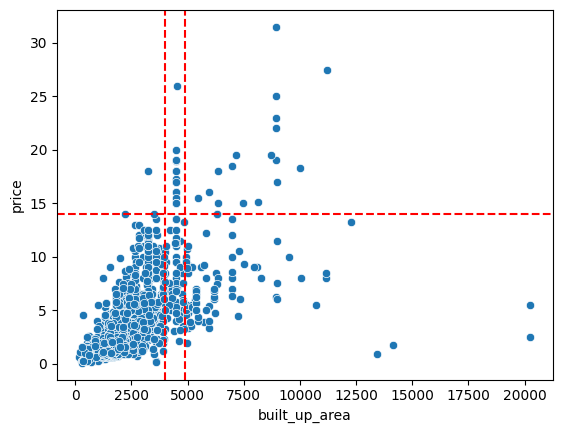

In [439]:
#checking for points having price above 14cr and built_up area between 4000 to 4900
sns.scatterplot(x = df['built_up_area'], y = df['price'])
plt.axhline(y=14, color='r', linestyle='--', label='Horizontal Line at y=3')
plt.axvline(x=4000, color='r', linestyle='--', label='Horizontal Line at y=3')
plt.axvline(x=4900, color='r', linestyle='--', label='Horizontal Line at y=3')

In [440]:
df[(df['built_up_area'] <5000) & (df['built_up_area'] >4000) & (df['price'] > 13)]

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,...,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score,area_bedroom_ratio
75,78.0,79.0,NaN,15.0,sector 26,33200.0,4518.072289,house,Plot area 502(419.74 sq.m.),NaN,...,North,moderately old,1.0,1.0,1.0,0.0,1.0,0.0,78.0,904.0
200,211.0,216.0,dlf city plots,13.5,sector 26,29880.0,4518.072289,house,Plot area 502(419.74 sq.m.),NaN,...,East,moderately old,1.0,0.0,1.0,1.0,0.0,0.0,104.0,904.0
238,252.0,257.0,NaN,18.9,sector 26,41833.0,4517.964287,house,Plot area 502(419.74 sq.m.),NaN,...,North-East,relatively new,1.0,1.0,1.0,0.0,1.0,0.0,120.0,753.0
326,343.0,352.0,dlf city plots,16.0,sector 26,37778.0,4235.269204,house,Plot area 500(418.06 sq.m.),NaN,...,NaN,relatively new,0.0,1.0,1.0,0.0,1.0,1.0,7.0,1059.0
738,781.0,797.0,NaN,16.0,sector 26,35556.0,4499.943751,house,Plot area 500(418.06 sq.m.),NaN,...,North-East,old property,0.0,0.0,0.0,0.0,0.0,1.0,0.0,900.0
791,836.0,852.0,NaN,19.0,sector 26,42222.0,4500.023684,house,Plot area 500(418.06 sq.m.),NaN,...,East,moderately old,1.0,1.0,1.0,0.0,1.0,0.0,103.0,750.0
878,929.0,950.0,NaN,17.0,sector 45,37777.0,4500.092649,house,Plot area 4500(418.06 sq.m.),NaN,...,North-East,relatively new,1.0,1.0,1.0,0.0,1.0,2.0,152.0,900.0
1326,1404.0,1440.0,NaN,15.0,sector 26,33333.0,4500.045000,house,Built Up area: 4500 (418.06 sq.m.),NaN,...,NaN,moderately old,1.0,0.0,0.0,0.0,1.0,0.0,36.0,1125.0
1356,1435.0,1474.0,NaN,20.0,sector 26,44444.0,4500.045000,house,Plot area 500(418.06 sq.m.),NaN,...,West,relatively new,1.0,1.0,0.0,0.0,0.0,2.0,97.0,900.0
1371,1450.0,1490.0,NaN,18.0,sector 26,39841.0,4517.958887,house,Plot area 502(419.74 sq.m.),NaN,...,North,moderately old,1.0,1.0,1.0,0.0,1.0,0.0,113.0,904.0


Points having price above 14cr and built_up area between 4000 to 4900 seems geniune

In [441]:
#Droping out unenecessary columns
df.drop(['area', 'super_built_up_area', 'carpet_area', 'area_bedroom_ratio', 'areaWithType'], inplace = True, axis = 1)

In [442]:
df.columns

Index(['level_0', 'index', 'society', 'price', 'sector', 'price_per_sqft',
       'property_type', 'built_up_area', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'agePossession', 'servant room', 'pooja room',
       'study room', 'others', 'store room', 'furnishing_type',
       'luxary_score'],
      dtype='object')

In [443]:
df.shape

(3591, 21)

#floornum

In [444]:
df['floorNum'].isna().sum()

15

In [445]:
df[df['floorNum'].isna()]

,level_0,index,society,price,sector,price_per_sqft,property_type,built_up_area,bedRoom,bathroom,...,floorNum,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
31,33.0,34.0,experion heartsong,1.08,dwarka expressway,6150.000000,flat,1747.524,3.0,3.0,...,NaN,NaN,under construction,0.0,0.0,0.0,0.0,0.0,1.0,0.0
191,202.0,207.0,ansal sushant lok,10.50,sector 43,27911.000000,house,3739.650,4.0,4.0,...,NaN,North-East,old property,1.0,0.0,0.0,0.0,0.0,1.0,59.0
298,313.0,321.0,NaN,5.60,sector 2,17284.000000,house,3220.807,8.0,6.0,...,NaN,South-West,moderately old,1.0,1.0,1.0,0.0,1.0,1.0,0.0
638,677.0,691.0,NaN,6.50,sector 7,15046.000000,house,4294.338,3.0,2.0,...,NaN,NaN,old property,0.0,0.0,0.0,0.0,0.0,1.0,9.0
1181,1249.0,1280.0,ansal sushant lok plots,3.30,sector 43,26570.000000,house,1234.673,1.0,1.0,...,NaN,NaN,under construction,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1531,1620.0,1664.0,NaN,0.60,sector 78,3692.000000,flat,1615.379,2.0,2.0,...,NaN,NaN,under construction,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1741,1843.0,1891.0,NaN,1.50,sector 3,10288.000000,house,1449.315,3.0,3.0,...,NaN,NaN,old property,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1906,2020.0,2072.0,vipul tatvam villa,8.50,sector 48,26235.000000,house,3220.807,4.0,4.0,...,NaN,East,moderately old,1.0,1.0,0.0,0.0,1.0,1.0,88.0
2010,2131.0,2189.0,NaN,13.00,sector 25,45710.000000,house,2827.154,6.0,8.0,...,NaN,NaN,relatively new,1.0,1.0,1.0,0.0,1.0,2.0,0.0
2058,2182.0,2240.0,NaN,4.60,sector 26,12198.000000,house,3748.638,4.0,4.0,...,NaN,NaN,old property,0.0,0.0,0.0,0.0,0.0,1.0,28.0


##we can see there are 15 mising values out of which 3 are house so we will replace missing values in floorNum with median  values of floorNum of house

In [446]:
floor_median = df[df['property_type'] == 'house']['floorNum'].median()

df['floorNum'].fillna(floor_median, inplace = True)

#facing

In [447]:
df['facing'].isna().sum()

1030

In [448]:
df[df['facing'].isna()]

,level_0,index,society,price,sector,price_per_sqft,property_type,built_up_area,bedRoom,bathroom,...,floorNum,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
1,1.0,1.0,signature global park,0.58,sohna road,7056.0,flat,817.159000,2.0,2.0,...,3.0,NaN,undefined,0.0,0.0,0.0,0.0,0.0,1.0,58.0
5,5.0,5.0,ansal height 86,0.80,sector 86,5882.0,flat,1351.945000,2.0,2.0,...,1.0,NaN,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9.0,9.0,godrej habitat,1.30,sector 3,9002.0,flat,1614.000000,2.0,2.0,...,6.0,NaN,under construction,0.0,0.0,0.0,0.0,0.0,1.0,36.0
11,12.0,12.0,signature global city,1.10,sector 37d,8800.0,flat,1397.000000,3.0,3.0,...,1.0,NaN,old property,0.0,0.0,0.0,0.0,0.0,1.0,16.0
12,13.0,13.0,signature global city 92,0.78,sector 92,8047.0,flat,1076.878774,2.0,2.0,...,2.0,NaN,new Property,0.0,0.0,0.0,0.0,0.0,0.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,3796.0,3890.0,spaze privy at,1.20,sector 84,7453.0,flat,1448.460056,2.0,2.0,...,3.0,NaN,relatively new,0.0,0.0,1.0,0.0,0.0,0.0,133.0
3586,3797.0,3891.0,sare green parc,0.85,sector 92,6741.0,flat,1253.505000,3.0,2.0,...,14.0,NaN,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3587,3798.0,3892.0,signature global park,0.95,sohna road,7846.0,flat,1203.536000,3.0,2.0,...,1.0,NaN,relatively new,0.0,0.0,0.0,0.0,0.0,1.0,46.0
3589,3800.0,3894.0,central park flower valley aqua front towers,2.10,sector 33,11738.0,flat,1609.507664,3.0,3.0,...,6.0,NaN,under construction,0.0,0.0,0.0,0.0,0.0,1.0,24.0


In [449]:
# we will drop the facing column because there are 1030 missing values and there is possible way ti impute them
df.drop('facing', inplace = True, axis = 1)

In [450]:
df.isna().sum()

level_0              0
index                0
society            361
price                0
sector               0
price_per_sqft       0
property_type        0
built_up_area        0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
servant room         0
pooja room           0
study room           0
others               0
store room           0
furnishing_type      0
luxary_score         0
dtype: int64

In [451]:
df[df['society'].isna()]

,level_0,index,society,price,sector,price_per_sqft,property_type,built_up_area,bedRoom,bathroom,balcony,floorNum,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
22,23.0,23.0,NaN,9.90,sector 25,29333.000000,house,3354.985000,5.0,5.0,2,2.0,moderately old,0.0,1.0,0.0,0.0,0.0,0.0,106.0
55,57.0,58.0,NaN,0.55,sector 3,7333.000000,house,745.576000,1.0,1.0,0,1.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59,61.0,62.0,NaN,9.00,sector 13,11111.111111,house,8100.000000,10.0,5.0,3+,4.0,old property,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75,78.0,79.0,NaN,15.00,sector 26,33200.000000,house,4491.218000,5.0,6.0,3+,3.0,moderately old,1.0,1.0,1.0,0.0,1.0,0.0,78.0
101,105.0,107.0,NaN,3.25,sector 24,30384.000000,house,1063.259000,4.0,4.0,3,3.0,old property,0.0,0.0,0.0,0.0,0.0,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,3754.0,3848.0,NaN,5.80,sector 26,32222.000000,house,1800.012414,4.0,3.0,2,2.0,relatively new,0.0,0.0,0.0,0.0,1.0,1.0,21.0
3556,3765.0,3859.0,NaN,8.50,sector 17b,18814.000000,house,4491.218000,4.0,4.0,2,2.0,old property,1.0,1.0,1.0,0.0,0.0,0.0,21.0
3581,3792.0,3886.0,NaN,1.65,sector 9,18333.000000,house,894.627000,2.0,3.0,0,3.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3591,3802.0,3896.0,NaN,1.35,sector 105,3857.000000,house,3479.212000,5.0,3.0,3,3.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [452]:
df.shape

(3591, 20)

#agePossesion

In [453]:
df['agePossession'].value_counts()

relatively new        1619
new Property           594
moderately old         534
old property           311
undefined              297
under construction     236
Name: agePossession, dtype: int64

In [454]:
df.drop(['level_0', 'index'], axis = 1, inplace = True)

In [455]:
#there are total 297 undefined values which we need to replace with appropriate values

df[df['agePossession'] == 'undefined']

,society,price,sector,price_per_sqft,property_type,built_up_area,bedRoom,bathroom,balcony,floorNum,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
1,signature global park,0.58,sohna road,7056.0,flat,817.159,2.0,2.0,2,3.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,58.0
2,chd avenue,0.95,sector 71,7917.0,flat,1192.836,2.0,2.0,0,5.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,ansal height 86,0.80,sector 86,5882.0,flat,1351.945,2.0,2.0,0,1.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,m3m heights,1.90,sector 65,13991.0,flat,1349.912,2.0,2.0,2,40.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,48.0
29,vatika independent floors,1.45,sector 82,8056.0,flat,1789.361,4.0,3.0,0,1.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,mapsko casa bella,1.75,sector 82,6903.0,flat,2519.957,4.0,5.0,3+,1.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,54.0
3572,dlf the arbour,8.50,sector 63,21519.0,flat,3926.579,4.0,4.0,0,27.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,61.0
3581,NaN,1.65,sector 9,18333.0,house,894.627,2.0,3.0,0,3.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3586,sare green parc,0.85,sector 92,6741.0,flat,1253.505,3.0,2.0,2,14.0,undefined,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [456]:
#based on sector and property type we will replace undefined value

def sec_proptype_imput (row):
  if row['agePossession'] == 'undefined':
    mode_value = df[(df['property_type'] == row['property_type']) & (df['sector'] == row['sector'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else :
      return np.nan
  else:
    return row['agePossession']




In [457]:
df['agePossession'] = df.apply(sec_proptype_imput, axis = 1)

In [458]:
df['agePossession'].value_counts()

relatively new        1744
new Property           647
moderately old         572
old property           343
under construction     241
undefined               44
Name: agePossession, dtype: int64

In [459]:
df[(df['property_type'] == 'house') & (df['sector'] == 'sector 26')]['agePossession'].mode().iloc[0]

'old property'

In [460]:
#still there are some rows where agePosession is undefined. This happened may be because of after applying the function we are getting mode as 'undefined'
#so now we will replace the "undefined" only based on sector

def sec_imput (row):
  if row['agePossession'] == 'undefined':
    mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else :
      return np.nan
  else:
    return row['agePossession']

In [461]:
df['agePossession'] = df.apply(sec_imput, axis = 1)

In [462]:
df['agePossession'].value_counts()

relatively new        1756
new Property           648
moderately old         577
old property           355
under construction     241
undefined               14
Name: agePossession, dtype: int64

In [463]:
#replace the "undefined" only based on property_type

def proptype_imput (row):
  if row['agePossession'] == 'undefined':
    mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else :
      return np.nan
  else:
    return row['agePossession']

In [464]:
df['agePossession'] = df.apply(proptype_imput, axis = 1)

In [465]:
df['agePossession'].value_counts()

relatively new        1758
new Property           648
moderately old         589
old property           355
under construction     241
Name: agePossession, dtype: int64

In [466]:
df.isna().sum()

society            361
price                0
sector               0
price_per_sqft       0
property_type        0
built_up_area        0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
servant room         0
pooja room           0
study room           0
others               0
store room           0
furnishing_type      0
luxary_score         0
dtype: int64

In [467]:
df.to_csv("gurgaon_properties_missing_values_imputed")